### End of Course Assessment 

In [1]:
from datetime import datetime
CURRENT_TIME = datetime.now().strftime("%d-%m-%y_%H:%M")
AUTHOR = 'AL; HW'


from IPython.display import display, Markdown,Latex,HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

sys.path.append("../")
from Code import preprocessing as pp
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

In [2]:
%%writefile 'my_pdf_template.tex.j2'
((*- extends 'latex/style_jupyter.tex.j2' -*))

((* block docclass *))
  \documentclass[12pt]{article}
((* endblock docclass *))

((* block packages *))
((( super() ))) % load all other packages
\usepackage{authblk}
((* endblock packages *))

((* block margins *))
\geometry{verbose,tmargin=1in,bmargin=1in,lmargin=0.75in,rmargin=0.75in}
((* endblock margins *))

((* block title -*))
((( super() ))) % load all other packages
\title{Max Planck School of cognition: Artificial Intelligence and Intelligent Systems - end of course assessment}
((*- endblock title *))

((* block date *))
\date{\today}
((* endblock date *))
    
((* block author *))
\author[1]{Anisbel Leon}
\author[1]{Also Hanna Wiedenhaus}
\affil[1]{Leibniz-Institut für Troposphärenforschung e.V., Permoserstraße 15, 04318 Leipzig}
((* endblock author *))

((* block maketitle *))
    \maketitle
    \tableofcontents
    \pagebreak
((* endblock maketitle *))

Writing my_pdf_template.tex.j2


In [3]:
%%capture
%%writefile 'cfg.py'

c = get_config()
c.NbConvertApp.export_format = 'pdf'
c.TemplateExporter.extra_template_basedirs = ['.']
c.Exporter.template_file = 'my_pdf_template.tex.j2'

# How are vitamin B12 deficiency and dementia related? 

In [4]:
display(Latex(r'''
\begin{abstract}
Test
\end{abstract}
'''))


<IPython.core.display.Latex object>

## Introduction

##### Dementia is a combination of symptoms of progressive decline in cognitive, emotional and social skills. One of the key symptoms is memory impairment. A few forms of dementia are reversible; for some other forms, limited therapeutic interventions are possible, but these can only delay the onset of certain symptoms. This report examines the proximate influences of lifestyle on the incidence of dementia. Metabolic B12 deficiency is widely prevalent and occurs in 10-40% of the population (Spence, 2016). It has long been associated with a variety of hematologic, neurologic, and psychiatric disorders. The described psychological effects associated with cobalamin deficiency range from mood swings to psychotic episodes to cognitive impairment (slow thinking, memory impairment, confusion, dementia) (Goebels and Soyka, 2000). The psychiatric syndrome most commonly associated with vitamin B12 deficiency in the medical literature is dementia (Cunha et al., 1995). Since this is one of the few treatable causes of dementia, extensive research is needed. Investigation of the relationship between vitamin B12 deficiency and dementia should be based on a broad data set. Therefore, the OASIS-3 (Open Access Series of Imaging Studies) dataset is used in this study. The dataset includes MRI and PET imaging and associated clinical data for 1098 participants. The study examined 605 cognitively normal adults and 493 individuals in various stages of cognitive decline ranging in age from 42 to 95 years over a 15-year period (LaMontagne et al., 2019). 

## Methods
### OASIS-3 Dataset

##### In the dataset, dementia status was assessed using the Clinical Dementia Rating Scale (CDR). Where CDR 0 represents normal cognitive function, CDR 0.5 for very mild impairment, CDR 1 for mild impairment, and CDR 2 for moderate dementia.Once a participant reached CDR 2, he or she was no longer eligible for face-to-face assessment (LaMontagne et al., 2019). Data were collected according to the Uniform Data Set (UDS), which defines a common set of clinical observations collected longitudinally from ADC participants using standard methods (Morris et al., 2006). During the assessment of the participants, a diagnostic recording and an Interview was conducted. The results were recorded in a coded dementia diagnosis: in the OASIS "ADRC Clinical Data" dx1-dx5 data type. Diagnoses for this variable included "cognitively normal," "AD dementia," "vascular dementia," and contributing factors such as vitamin deficiency, alcoholism, and mood disorders. Diagnosis identification for variables dx1-dx5 is performed separately from UDS assessments (LaMontagne et al., 2019).

##### ---- Data preparation ----

In [10]:
# load data
clean = pp.load('clean',reapply=True)
adrc = clean['ADRC_ADRCCLINICALDATA']
# feature selection
adrc = adrc[['ADRC_ADRCCLINICALDATA ID', 'days_since_entry', 'ageAtEntry', 'cdr', 'dx1', 'dx2','dx3','dx4','dx5',]]
adrc

,ADRC_ADRCCLINICALDATA ID,days_since_entry,ageAtEntry,cdr,dx1,dx2,dx3,dx4,dx5
0,OAS30001_ClinicalData_d0000,0,65.149895,0.0,Cognitively normal,.,.,.,.
1,OAS30001_ClinicalData_d0339,339,65.149895,0.0,Cognitively normal,.,.,.,.
2,OAS30001_ClinicalData_d0722,722,65.149895,0.0,Cognitively normal,.,.,.,.
3,OAS30001_ClinicalData_d1106,1106,65.149895,0.0,Cognitively normal,.,.,.,.
4,OAS30001_ClinicalData_d1456,1456,65.149895,0.0,Cognitively normal,.,.,.,.
...,...,...,...,...,...,...,...,...,...
6219,OAS31172_ClinicalData_d1215,1215,70.902120,0.0,Cognitively normal,.,.,.,.
6220,OAS31172_ClinicalData_d1565,1565,70.902120,0.0,Cognitively normal,.,.,.,.
6221,OAS31172_ClinicalData_d1908,1908,70.902120,0.0,Cognitively normal,Remote Hypothyroidism,.,.,.
6222,OAS31172_ClinicalData_d2816,2816,70.902120,0.0,Cognitively normal,Remote Mood disorder,.,.,.


In [17]:
# count occurrences of B 12 deficiencies and alcoholism
Active_B12_Deficiency = adrc.apply(pd.Series.value_counts, axis=1)[['Active B-12 Deficiency']].fillna(0)
Remote_B12_Deficiency = adrc.apply(pd.Series.value_counts, axis=1)[['Remote B-12 Deficiency']].fillna(0)
Remote_Alcoholism = adrc.apply(pd.Series.value_counts, axis=1)[['Remote Alcoholism']].fillna(0)
Active_Alcoholism = adrc.apply(pd.Series.value_counts, axis=1)[['Active Alcoholism']].fillna(0)


In [27]:
adrc[('Active_B12_Deficiency')] = Active_B12_Deficiency
adrc[('Remote_B12_Deficiency')] = Remote_B12_Deficiency
adrc[('Remote_Alcoholism')] = Remote_Alcoholism
adrc[('Active_Alcoholism')] = Active_Alcoholism

<ipython-input-27-70e0c3e54279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adrc[('Active_B12_Deficiency')] = Active_B12_Deficiency
<ipython-input-27-70e0c3e54279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adrc[('Remote_B12_Deficiency')] = Remote_B12_Deficiency
<ipython-input-27-70e0c3e54279>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [28]:
adrc[('Active_B12_Deficiency')]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6219    0.0
6220    0.0
6221    0.0
6222    0.0
6223    0.0
Name: Active_B12_Deficiency, Length: 6224, dtype: float64

In [37]:
adrc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ADRC_ADRCCLINICALDATA ID  6224 non-null   object 
 1   days_since_entry          6224 non-null   int64  
 2   ageAtEntry                6224 non-null   float64
 3   cdr                       6224 non-null   float64
 4   dx1                       6222 non-null   object 
 5   dx2                       6211 non-null   object 
 6   dx3                       6211 non-null   object 
 7   dx4                       6211 non-null   object 
 8   dx5                       6211 non-null   object 
 9   Active_B12_Deficiency     6224 non-null   float64
 10  Remote_B12_Deficiency     6224 non-null   float64
 11  Remote_Alcoholism         6224 non-null   float64
 12  Active_Alcoholism         6224 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 632.2+ KB


In [36]:
# sum
adrc.sum(axis=0)

ADRC_ADRCCLINICALDATA ID    OAS30001_ClinicalData_d0000OAS30001_ClinicalDa...
days_since_entry                                                     11144989
ageAtEntry                                                      428087.302704
cdr                                                                    1218.5
Active_B12_Deficiency                                                    22.0
Remote_B12_Deficiency                                                    44.0
Remote_Alcoholism                                                        42.0
Active_Alcoholism                                                        32.0
dtype: object

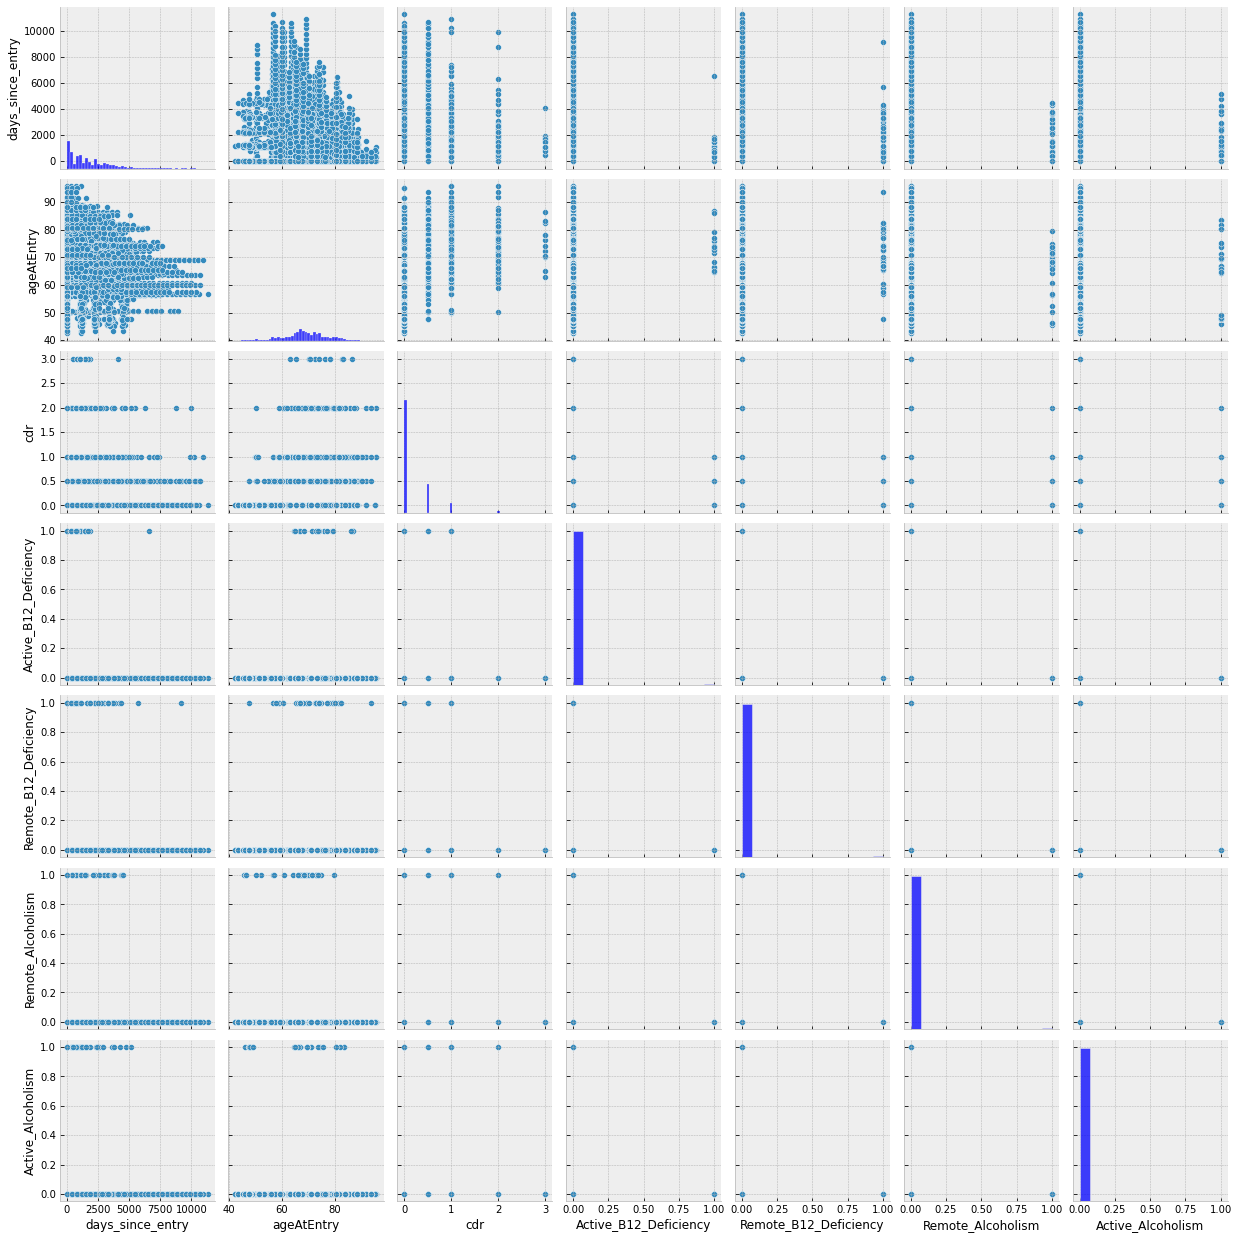

In [38]:
sns.pairplot(adrc)

In [52]:
# Standardize data (0 mean, 1 stdev)
# separate dataset into input and output components
# convert into integer: categorical values for linear Regression
array = adrc.values
X = array[:,[1,2,9,10,11,12]]
X = np.int32(X)
Y = array[:,3]
Y = np.int32(Y)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX)
X.shape

[[-1.019 -0.393 -0.06  -0.084 -0.082 -0.072]
 [-0.826 -0.393 -0.06  -0.084 -0.082 -0.072]
 [-0.608 -0.393 -0.06  -0.084 -0.082 -0.072]
 ...
 [ 0.067  0.203 -0.06  -0.084 -0.082 -0.072]
 [ 0.584  0.203 -0.06  -0.084 -0.082 -0.072]
 [ 0.856  0.203 -0.06  -0.084 -0.082 -0.072]]


(6224, 6)

In [53]:
# Evaluate using Cross Validation
# kfold: Split a dataset into training and test sets
kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print(results)

Accuracy: 91.757% (1.520%)
[0.933 0.907 0.917 0.937 0.915 0.915 0.934 0.902 0.887 0.929]


In [54]:
# KNN Regression

array = adrc.values
X_cont = array[:,[1,2,9,10,11,12]]
Y_cont = array[:,3]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X_cont, Y_cont, cv=kfold, scoring=scoring)
print(results.mean())
print(results)

-0.16689554742378182
[-0.148 -0.176 -0.155 -0.201 -0.173 -0.164 -0.173 -0.158 -0.156 -0.166]


In [55]:
%%capture
%%writefile -a 'my_pdf_template.tex.j2'

((* block bibliography *))
\bibliographystyle{unsrt}
\bibliography{ref}
((* endblock bibliography *))

In [56]:
%%capture
%%writefile 'ref.bib'

@Article{LaMontagne_2019,
  author    = {Pamela J. LaMontagne and Tammie LS. Benzinger and John C. Morris and Sarah Keefe and Russ Hornbeck and Chengjie Xiong and Elizabeth Grant and Jason Hassenstab and Krista Moulder and Andrei G. Vlassenko and Marcus E. Raichle and Carlos Cruchaga and Daniel Marcus},
  title     = {{OASIS}-3: Longitudinal Neuroimaging, Clinical, and Cognitive Dataset for Normal Aging and Alzheimer Disease},
  year      = {2019},
  month     = {dec},
  doi       = {https://doi.org/10.1101/2019.12.13.19014902},
  publisher = {Cold Spring Harbor Laboratory},
}

@Article{Cunha_1995,
  author    = {Ulisses Gabriel de Vasconcelos Cunha and F{\'{a}}bio Lopes Rocha and Josecy Maria de Souza Peixoto and Maria Fl{\'{a}}via de Mor{\~{a}}o Motta and Maira Tonidandel Barbosa},
  journal   = {International Psychogeriatrics},
  title     = {Vitamin B12 Deficiency and Dementia},
  year      = {1995},
  month     = {mar},
  number    = {1},
  pages     = {85--88},
  volume    = {7},
  doi       = {https://doi.org/10.1017/S1041610295001876},
  publisher = {Cambridge University Press ({CUP})},
} 
   
@Article{Goebels_2000,
  author    = {Norbert Goebels and Michael Soyka},
  journal   = {The Journal of Neuropsychiatry and Clinical Neurosciences},
  title     = {Dementia Associated With Vitamin B12Deficiency},
  year      = {2000},
  month     = {aug},
  number    = {3},
  pages     = {389--394},
  volume    = {12},
  doi       = {https://doi.org/10.1176/jnp.12.3.389},
  publisher = {American Psychiatric Association Publishing},
}               

@Article{Spence_2016,
  author    = {J. David Spence},
  journal   = {Nutrition Research},
  title     = {Metabolic vitamin B12 deficiency: a missed opportunity to prevent dementia and stroke},
  year      = {2016},
  month     = {feb},
  number    = {2},
  pages     = {109--116},
  volume    = {36},
  doi       = {https://doi.org/10.1016/j.nutres.2015.10.003},
  publisher = {Elsevier {BV}},
} 
               
@Article{Morris_2006,
  author    = {John C. Morris and Sandra Weintraub and Helena C. Chui and Jeffrey Cummings and Charles DeCarli and Steven Ferris and Norman L. Foster and Douglas Galasko and Neill Graff-Radford and Elaine R. Peskind and Duane Beekly and Erin M. Ramos and Walter A. Kukull},
  journal   = {Alzheimer Disease {\&} Associated Disorders},
  title     = {The Uniform Data Set ({UDS}): Clinical and Cognitive Variables and Descriptive Data From Alzheimer Disease Centers},
  year      = {2006},
  month     = {oct},
  number    = {4},
  pages     = {210--216},
  volume    = {20},
  doi       = {10.1097/01.wad.0000213865.09806.92},
  publisher = {Ovid Technologies (Wolters Kluwer Health)},
}               

In [57]:
%%capture
%%bash -s "$CURRENT_TIME" "$AUTHOR"
jupyter nbconvert --no-input --output pdf/some_notebook_$1_$2.pdf --config cfg.py  Final_Project.ipynb


CalledProcessError: Command 'b'jupyter nbconvert --no-input --output pdf/some_notebook_$1_$2.pdf --config cfg.py  Final_Project.ipynb\n'' returned non-zero exit status 2.